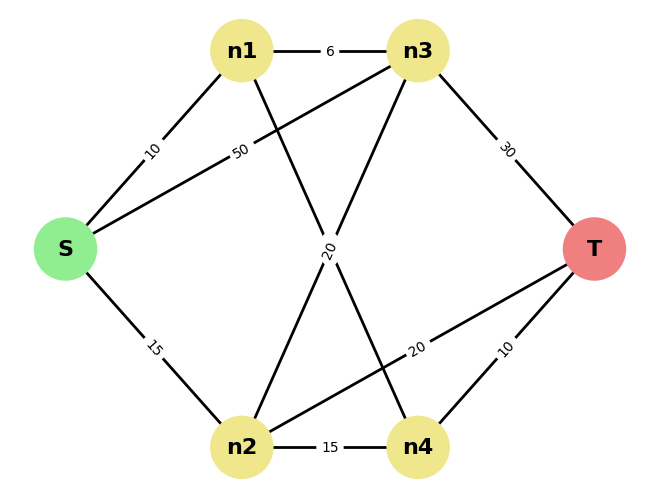

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
nodes = ['S', 'n1', 'n2', 'n3', 'n4', 'T']
G.add_nodes_from(nodes)

# Add edges with weights
edges = [
    ('S', 'n1', 10),
    ('S', 'n2', 15),
    ('S', 'n3', 50),
    ('n1', 'n4', 25),
    ('n1', 'n3', 6),
    ('n2', 'n4', 15),
    ('n2', 'T', 20),
    ('n3', 'n2', 20),
    ('n3', 'T', 30),
    ('n4', 'T', 10)
]
G.add_weighted_edges_from(edges)

# Define positions for a clear layout
pos = {
    'S': (-1, 0),
    'n1': (0, 1),
    'n2': (0, -1),
    'n3': (1, 1),
    'n4': (1, -1),
    'T': (2, 0)
}

# Define node colors based on their types
node_colors = ['lightgreen' if node == 'S' else 'lightcoral' if node == 'T' else 'khaki' for node in G.nodes]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=16, font_weight='bold', edge_color='black', width=2)

# Draw edge labels to show the weights
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

plt.show()

## Defining Source and Target node.

In [2]:
source_node = 'S'
target_node = 'T'

## Finding all paths from source node to the target node.

In [3]:
all_paths = list(nx.all_simple_paths(G, source=source_node, target=target_node))  # Get all simple paths
all_paths

[['S', 'n1', 'n4', 'n2', 'T'],
 ['S', 'n1', 'n4', 'n2', 'n3', 'T'],
 ['S', 'n1', 'n4', 'T'],
 ['S', 'n1', 'n3', 'n2', 'n4', 'T'],
 ['S', 'n1', 'n3', 'n2', 'T'],
 ['S', 'n1', 'n3', 'T'],
 ['S', 'n2', 'n4', 'n1', 'n3', 'T'],
 ['S', 'n2', 'n4', 'T'],
 ['S', 'n2', 'T'],
 ['S', 'n2', 'n3', 'n1', 'n4', 'T'],
 ['S', 'n2', 'n3', 'T'],
 ['S', 'n3', 'n1', 'n4', 'n2', 'T'],
 ['S', 'n3', 'n1', 'n4', 'T'],
 ['S', 'n3', 'n2', 'n4', 'T'],
 ['S', 'n3', 'n2', 'T'],
 ['S', 'n3', 'T']]

## Finding the shortest path from source node to the target node.

In [4]:
shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight="weight")
shortest_path_length = nx.shortest_path_length(G, source=source_node, target=target_node, weight="weight")

print(f"Shortest path from S to T is {shortest_path}, and it have a length of {shortest_path_length}.")

Shortest path from S to T is ['S', 'n2', 'T'], and it have a length of 35.


## In the example shown in our work, length threshold $\epsilon$ is set to 0.5. So, a recommended near-shortest path must have a length |p|≤ shortest_path_length * (1 + 0.5).

In [5]:
eps = 0.5

permissible_length = shortest_path_length * (1 + eps)
permissible_length

52.5

## Finding paths with path length less than or equal to 52.5.

In [6]:
near_shortest_paths = []

for path in all_paths:
    path_length = nx.path_weight(G, path, weight="weight")
    if path_length <= permissible_length:
        print(path, path_length)
        near_shortest_paths.append((path, path_length))
    else:
        continue

['S', 'n1', 'n4', 'T'] 45
['S', 'n1', 'n3', 'T'] 46
['S', 'n2', 'n4', 'T'] 40
['S', 'n2', 'T'] 35


## Assigning names to the selected paths.

In [7]:
# Same names are used in the paper.

ps = ['S', 'n2', 'T']
p1 = ['S', 'n1', 'n4', 'T']
p2 = ['S', 'n1', 'n3', 'T']
p3 = ['S', 'n2', 'n4', 'T']

## Calculating dismilarity between paths.

In [8]:
def sum_of_edges(edge_list, edge_weights):
    
    total = 0 
    for i in edge_list:
        if i in edge_weights.keys():
            total+=edge_weights[i]
        else:
            rev_i = (i[1], i[0])
            total+=edge_weights[rev_i]
    return total
    

def get_edges_from_path(path):
    """
    Returns a list of edges for the given path.
    
    Args:
        path (list): A list of nodes representing the path, e.g., [1, 2, 3, 4, 5]
        
    Returns:
        list of tuples: A list of edges, e.g., [(1, 2), (2, 3), (3, 4), (4, 5)]
    """
    return [(path[i], path[i + 1]) for i in range(len(path) - 1)]



def dissimilarity_between_paths(path_a, path_b, graph):

    # Calculate the length of the path based on edge weights
    edge_weights = nx.get_edge_attributes(graph, 'weight')
    edge_a = set(get_edges_from_path(path_a))
    edge_b = set(get_edges_from_path(path_b))

    # Find shared edges (intersection)
    shared_edges = list(edge_a & edge_b)

    # Find union of edges
    union_edges = list(edge_a | edge_b)

    shared_edges_weight = sum_of_edges(shared_edges, edge_weights)
    union_edges_weight = sum_of_edges(union_edges, edge_weights)

    dissimilarity_value = 1 - (shared_edges_weight/union_edges_weight)

    return dissimilarity_value

ps_p1  = dissimilarity_between_paths(ps, p1, G)
ps_p2  = dissimilarity_between_paths(ps, p2, G)
ps_p3  = dissimilarity_between_paths(ps, p3, G)

p1_p2  = dissimilarity_between_paths(p1, p2, G)
p1_p3  = dissimilarity_between_paths(p1, p3, G)

p2_p3  = dissimilarity_between_paths(p2, p3, G)

ps_p1, ps_p2, p2_p3, p1_p2, p1_p3, ps_p3

(1.0, 1.0, 1.0, 0.8765432098765432, 0.8666666666666667, 0.75)

## Four distinct combinations of 3 paths are possible, and their diversities are:

1) **(ps,p1,p2): Diversity = 0.88, calculated as min(1,0.88,1).**
2) **(ps,p2,p3): Diversity = 0.75, calculated as min(1,1,0.75).**
3) **(ps,p1,p3): Diversity = 0.75, calculated as min(1,0.87,0.75).**
4) **(p1,p2,p3): Diversity = 0.87, calculated as min(0.88,1,0.87).**

## **The solution to the given KMDNSP problem is the set containing paths (ps,p1,p2), which has the highest diversity score of 0.88.**